In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('dataframes/withCurvatureSign/totalMetricsStatsPerformSmallerIts.pkl', 'rb') as f:
    statsPerformMetrics = pickle.load(f)
with open('dataframes/withCurvatureSign/totalMetricsSkillCornerSmallerIts.pkl', 'rb') as f:
    skillCornerMetrics = pickle.load(f)

In [12]:
print(statsPerformMetrics[statsPerformMetrics['name'] == 'Kade'])
skillCornerMetrics.columns = ['name', 'iterations', 'maxSpeed', 'distanceCovered', 'maximumSpeedSustained', 'sprintCount']
skillCornerMetrics = skillCornerMetrics[['name', 'iterations', 'maxSpeed', 'maximumSpeedSustained', 'sprintCount', 'distanceCovered' ]]
print(skillCornerMetrics[skillCornerMetrics['name'] == 'Kade'])

players = ['Kade', 'Schmid', 'Frei']
for player in players:
    spmetrics = statsPerformMetrics[statsPerformMetrics['name'] == player][['iterations', 'maxSpeed', 'maximumSpeedSustained','sprintCount', 'distanceCovered']]
    scmetrics = skillCornerMetrics[skillCornerMetrics['name'] == player][['iterations', 'maxSpeed', 'maximumSpeedSustained','sprintCount', 'distanceCovered']]
    spmetrics.to_csv(f'csvs/{player}/SPmetrics.csv')
    scmetrics.to_csv(f'csvs/{player}/SCmetrics.csv')

   name  iterations  maxSpeed  maximumSpeedSustained  sprintCount  \
0  Kade           0  9.247037                    840           16   
1  Kade           2  9.244165                    840           16   
2  Kade           5  9.237979                    840           16   
3  Kade          10  9.230852                    840           16   
4  Kade          25  9.210093                    840           16   
5  Kade          30  9.203002                    840           16   
6  Kade          40  9.188682                    840           15   
7  Kade          50  9.174243                    840           16   

   distanceCovered  
0      6498.637744  
1      6498.699951  
2      6498.631083  
3      6498.528976  
4      6498.200466  
5      6498.083560  
6      6497.841442  
7      6497.590534  
   name  iterations  maxSpeed  maximumSpeedSustained  sprintCount  \
0  Kade           0  9.101897                    800           16   
0  Kade           2  9.073897                    80

KeyError: ('iterations', 'maxSpeed', 'maximumSpeedSustained', 'sprintCount', 'distanceCovered')

In [4]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 4, 4, 2])
print(
    (np.sqrt((x-y)**2)).sum()
)

4.0


In [5]:
# Takes as input two np.float arrays corresponding to one metric for each player array x for SkillCorner and y for StatsPerform respectively 
def computeRMSE(x, y): 
    assert len(x) == len(y)
    rmse = np.sqrt(((x-y)**2).sum()/x.size)
    return rmse

In [6]:
print(len(skillCornerMetrics['name'].unique()))

14


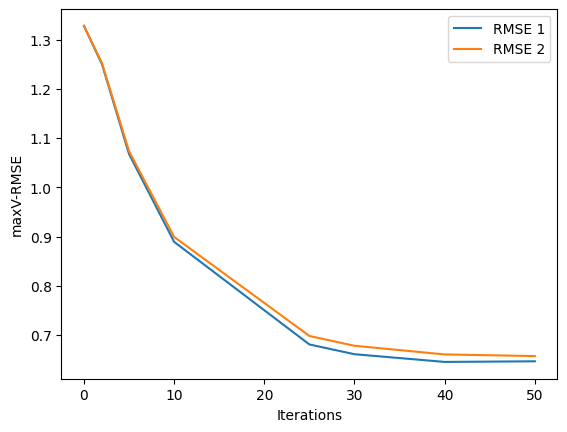

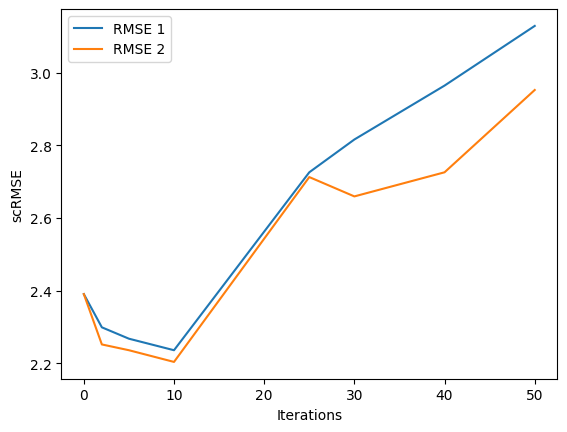

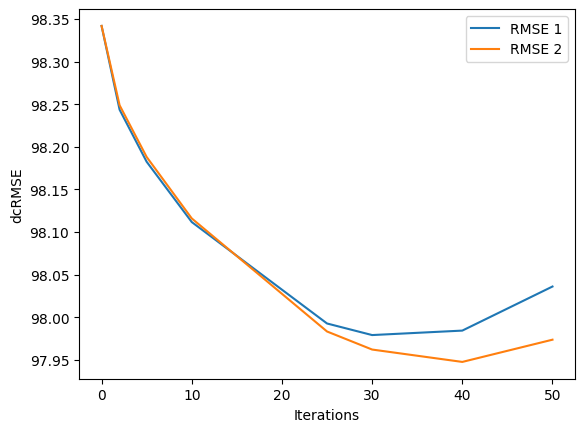

In [8]:
maxV_RMSE_to_OG = []
maxV_RMSE = []
for it in skillCornerMetrics['iterations'].unique():
    x1 = np.array([skillCornerMetrics[skillCornerMetrics['iterations'] == it]['maxSpeed']])
    y1 = np.array([statsPerformMetrics[statsPerformMetrics['iterations'] == it]['maxSpeed']])
    y2 = np.array([statsPerformMetrics[statsPerformMetrics['iterations'] == 0]['maxSpeed']])
    maxV_RMSE_to_OG.append(computeRMSE(x1, y2))
    maxV_RMSE.append(computeRMSE(x1, y1))

plt.plot(skillCornerMetrics['iterations'].unique(), maxV_RMSE_to_OG, label='RMSE 1')
plt.plot(skillCornerMetrics['iterations'].unique(), maxV_RMSE, label='RMSE 2')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('maxV-RMSE')
plt.show()

sc_RMSE_to_OG = []
sc_RMSE = []
for it in skillCornerMetrics['iterations'].unique():
    x1 = np.array([skillCornerMetrics[skillCornerMetrics['iterations'] == it]['sprintCount']])
    y1 = np.array([statsPerformMetrics[statsPerformMetrics['iterations'] == it]['sprintCount']])
    y2 = np.array([statsPerformMetrics[statsPerformMetrics['iterations'] == 0]['sprintCount']])
    sc_RMSE_to_OG.append(computeRMSE(x1, y2))
    sc_RMSE.append(computeRMSE(x1, y1))

plt.plot(skillCornerMetrics['iterations'].unique(), sc_RMSE_to_OG, label='RMSE 1')
plt.plot(skillCornerMetrics['iterations'].unique(), sc_RMSE, label='RMSE 2')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('scRMSE')
plt.show()

dc_RMSE_to_OG = []
dc_RMSE = []
for it in skillCornerMetrics['iterations'].unique():
    x1 = np.array([skillCornerMetrics[skillCornerMetrics['iterations'] == it]['distanceCovered']])
    y1 = np.array([statsPerformMetrics[statsPerformMetrics['iterations'] == it]['distanceCovered']])
    y2 = np.array([statsPerformMetrics[statsPerformMetrics['iterations'] == 0]['distanceCovered']])
    dc_RMSE_to_OG.append(computeRMSE(x1, y2))
    dc_RMSE.append(computeRMSE(x1, y1))

plt.plot(skillCornerMetrics['iterations'].unique(), dc_RMSE_to_OG, label='RMSE 1')
plt.plot(skillCornerMetrics['iterations'].unique(), dc_RMSE, label='RMSE 2')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('dcRMSE')
plt.show()

In [9]:
print(1 - maxV_RMSE_to_OG[2]/maxV_RMSE[0])

0.19587468832387767
